# Geocoding in Geopandas

It is possible to do [geocoding in Geopandas](http://geopandas.org/geocoding.html) using its integrated functionalities of geopy. Geopandas has a function called `geocode()` that can geocode a list of addresses (strings) and return a GeoDataFrame containing the resulting point objects in ``geometry`` column. 

Nice, isn't it! Let's try this out.

We will geocode addresses stored in a text file called `addresses.txt`. The addresses are located in San Salvario District in Turin.

The first rows of the data look like this:

```
id;addr
1000;Via Nizza 31, 10125 Turin, Italy
1001;Via Nizza 33, 00100 Turin, Italy
1002;Via Nizza 35, 10125 Turin, Italy
1003;Via Nizza 39, 10125 Turin, Italy
```

We have an `id` for each row and an address on column `addr`.

-  Let's first read the data into a Pandas DataFrame using the `read_csv()` -function:

In [1]:
# Import necessary modules
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

# Read the data
data = pd.read_csv('data/addresses.txt', sep=';')
data.head()

,id,addr
0,1000,"Via Nizza 31, 10125 Turin, Italy"
1,1001,"Via Nizza 33, 00100 Turin, Italy"
2,1002,"Via Nizza 35, 10125 Turin, Italy"
3,1003,"Via Nizza 41, 10125 Turin, Italy"
4,1005,"Via Saluzzo 18, 10125 Turin, Italy"


In [2]:
from geopandas.tools import geocode
help(geocode)

Help on function geocode in module geopandas.tools.geocoding:

geocode(strings, provider=None, **kwargs)
    Geocode a set of strings and get a GeoDataFrame of the resulting points.
    
    Parameters
    ----------
    strings : list or Series of addresses to geocode
    provider : str or geopy.geocoder
        Specifies geocoding service to use. If none is provided,
        will use 'geocodefarm' with a rate limit applied (see the geocodefarm
        terms of service at:
        https://geocode.farm/geocoding/free-api-documentation/ ).
    
        Either the string name used by geopy (as specified in
        geopy.geocoders.SERVICE_TO_GEOCODER) or a geopy Geocoder instance
        (e.g., geopy.geocoders.GeocodeFarm) may be used.
    
        Some providers require additional arguments such as access keys
        See each geocoder's specific parameters in geopy.geocoders
    
    Notes
    -----
    Ensure proper use of the results by consulting the Terms of Service for
    your pro

In [3]:
# Geocode addresses using Nominatim. Remember to provide a custom "application name" in the user_agent parameter!
geo = geocode(data['addr'], provider='nominatim', user_agent='autogis_xx', timeout=4)

In [4]:
geo

,geometry,address
0,POINT (7.67749 45.05796),"31, Via Nizza, San Salvario, Torino, Provincia..."
1,POINT (7.67740 45.05771),"33, Via Nizza, San Salvario, Torino, Provincia..."
2,POINT (7.67677 45.05642),"35, Via Nizza, San Salvario, Torino, Provincia..."
3,POINT (7.67642 45.05556),"41/B, Via Nizza, San Salvario, Torino, Provinc..."
4,POINT (7.67917 45.05962),"18, Via Saluzzo, San Salvario, Torino, Provinc..."
5,POINT (7.67973 45.05774),"18, Via Belfiore, San Salvario, Torino, Provin..."
6,POINT (7.67758 45.05728),"3, Corso Guglielmo Marconi, San Salvario, Tori..."
7,POINT (7.68028 45.05881),"3, Via Belfiore, San Salvario, Torino, Provinc..."
8,POINT (7.67931 45.05974),"Via Saluzzo, San Salvario, Torino, Provincia d..."
9,POINT (7.68016 45.05848),"5, Via Belfiore, San Salvario, Torino, Provinc..."


And Voilà! As a result we have a ``GeoDataFrame`` that contains our original
address and a ``geometry`` column containing ``Shapely Point`` -objects that
we can use for exporting the addresses to a Shapefile for example.
However, the ``id`` column is not there. Thus, we need to join the
information from ``data`` into our new GeoDataFrame ``geo``, thus making
a **Table Join**.

## Table join

<div class="alert alert-info">

**Table joins in pandas**
    
For a comprehensive overview of different ways of combining DataFrames and Series based on set theory, have a look at pandas documentation about [merge, join and concatenate](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html).


</div>


Table joins are really common procedures when doing GIS analyses. As you might remember from our earlier lessons, combining data from different tables based on common
**key** attribute can be done easily in Pandas/Geopandas using the [.merge()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html) -function. We used this approach in the geo-python course [exercise 6](https://geo-python.github.io/2018/lessons/L6/exercise-6.html#joining-data-from-one-dataframe-to-another).

However, sometimes it is useful to join two tables together based on the **index** of those DataFrames. In such case, we assume
that there is **same number of records** in our DataFrames and that the **order of the records should be the same** in both DataFrames.
In fact, now we have such a situation as we are geocoding our addresses where the order of the geocoded addresses in ``geo`` DataFrame is the same
as in our original ``data`` DataFrame.

Hence, we can join those tables together with ``join()`` -function which merges the two DataFrames together
based on index by default.

In [5]:
join = geo.join(data)
join.head()

,geometry,address,id,addr
0,POINT (7.67749 45.05796),"31, Via Nizza, San Salvario, Torino, Provincia...",1000,"Via Nizza 31, 10125 Turin, Italy"
1,POINT (7.67740 45.05771),"33, Via Nizza, San Salvario, Torino, Provincia...",1001,"Via Nizza 33, 00100 Turin, Italy"
2,POINT (7.67677 45.05642),"35, Via Nizza, San Salvario, Torino, Provincia...",1002,"Via Nizza 35, 10125 Turin, Italy"
3,POINT (7.67642 45.05556),"41/B, Via Nizza, San Salvario, Torino, Provinc...",1003,"Via Nizza 41, 10125 Turin, Italy"
4,POINT (7.67917 45.05962),"18, Via Saluzzo, San Salvario, Torino, Provinc...",1005,"Via Saluzzo 18, 10125 Turin, Italy"


- Let's also check the data type of our new ``join`` table.

In [6]:
type(join)

geopandas.geodataframe.GeoDataFrame

As a result we have a new GeoDataFrame called ``join`` where we now have
all original columns plus a new column for ``geometry``. **Note!** If you would do the join the other way around, i.e. `data.join(geo)`, the output would be a pandas DataFrame, not a GeoDataFrame!

-  Now it is easy to save our address points into a Shapefile


In [7]:
# Output file path
outfp = r"data/addresses.shp"

# Save to Shapefile
join.to_file(outfp)

## Reverse Geo-Coding

Now we will try to get the adress from a list of points refered to AirBnB data in Turin.

In [8]:
listings = pd.read_csv('./data/turin_arirbnb_listing.csv')
listings.head(6)

,room_id,survey_id,host_id,room_type,country,city,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,last_modified,latitude,longitude,location
0,14916015,1524,17448912,Entire home/apt,NaN,Turin,NaN,Centro - Crocetta,1,0.0,6,2,NaN,361,NaN,52:50.1,45.071306,7.673369,0101000020E6100000978FA4A487B11E401901158E2089...
1,15461380,1524,17448912,Entire home/apt,NaN,Turin,NaN,Centro - Crocetta,1,0.0,6,2,NaN,361,NaN,52:50.1,45.071379,7.673584,0101000020E61000007A6F0C01C0B11E40834F73F22289...
2,1537850,1524,8197694,Entire home/apt,NaN,Turin,NaN,"Aurora, Vanchiglia - Sassi - Madonna del Pilone",33,5.0,10,4,NaN,337,NaN,52:50.0,45.079862,7.751496,0101000020E61000009D4CDC2A88011F40B91803EB388A...
3,2471364,1524,1968104,Entire home/apt,NaN,Turin,NaN,Centro - Crocetta,2,0.0,9,4,NaN,301,NaN,28:12.5,45.066074,7.696544,0101000020E61000006DE690D442C91E40D68EE21C7588...
4,14929276,1524,37070506,Entire home/apt,NaN,Turin,NaN,San Salvario - Cavoretto - Borgo Po - Nizza Mi...,0,0.0,6,3,NaN,301,NaN,52:47.5,45.045680,7.707032,0101000020E6100000E2E6543200D41E40670A9DD7D885...
5,4084782,1524,3150094,Entire home/apt,NaN,Turin,NaN,Barriera di Milano - Regio Parco - Barca - Ber...,2,0.0,10,4,NaN,301,NaN,52:47.5,45.091333,7.680156,0101000020E610000074B680D07AB81E40D505BCCCB08B...


Now we cerate a ``geometry`` column that contains a ``Shapely Point Objec``t and transform in to ``GeoDataFrame``

In [9]:
import shapely.geometry as shp

listings['geometry'] = listings[['longitude','latitude']].apply(shp.Point, axis=1)
listings = gpd.GeoDataFrame(listings[:20])
listings.crs = {'init':'epsg:4326'}
print(listings.columns)
listings.head(5)

Index(['room_id', 'survey_id', 'host_id', 'room_type', 'country', 'city',
       'borough', 'neighborhood', 'reviews', 'overall_satisfaction',
       'accommodates', 'bedrooms', 'bathrooms', 'price', 'minstay',
       'last_modified', 'latitude', 'longitude', 'location', 'geometry'],
      dtype='object')


,room_id,survey_id,host_id,room_type,country,city,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,last_modified,latitude,longitude,location,geometry
0,14916015,1524,17448912,Entire home/apt,NaN,Turin,NaN,Centro - Crocetta,1,0.0,6,2,NaN,361,NaN,52:50.1,45.071306,7.673369,0101000020E6100000978FA4A487B11E401901158E2089...,POINT (7.67337 45.07131)
1,15461380,1524,17448912,Entire home/apt,NaN,Turin,NaN,Centro - Crocetta,1,0.0,6,2,NaN,361,NaN,52:50.1,45.071379,7.673584,0101000020E61000007A6F0C01C0B11E40834F73F22289...,POINT (7.67358 45.07138)
2,1537850,1524,8197694,Entire home/apt,NaN,Turin,NaN,"Aurora, Vanchiglia - Sassi - Madonna del Pilone",33,5.0,10,4,NaN,337,NaN,52:50.0,45.079862,7.751496,0101000020E61000009D4CDC2A88011F40B91803EB388A...,POINT (7.75150 45.07986)
3,2471364,1524,1968104,Entire home/apt,NaN,Turin,NaN,Centro - Crocetta,2,0.0,9,4,NaN,301,NaN,28:12.5,45.066074,7.696544,0101000020E61000006DE690D442C91E40D68EE21C7588...,POINT (7.69654 45.06607)
4,14929276,1524,37070506,Entire home/apt,NaN,Turin,NaN,San Salvario - Cavoretto - Borgo Po - Nizza Mi...,0,0.0,6,3,NaN,301,NaN,52:47.5,45.045680,7.707032,0101000020E6100000E2E6543200D41E40670A9DD7D885...,POINT (7.70703 45.04568)


From ``geopandas.tools`` we use ``reverse_geocode`` to obtain address from a ``Shapley Point Object``

In [10]:
adr=gpd.tools.reverse_geocode(listings.geometry, provider='nominatim', user_agent='test', timeout=1)

In [11]:
adr

,geometry,address
0,POINT (7.67338 45.07094),"Mastio della Cittadella, Via Carlo Promis, Qua..."
1,POINT (7.67428 45.07113),"Pietro Micca, Via Cernaia, Quadrilatero Romano..."
2,POINT (7.75192 45.07944),"164, Strada di Superga, Borgata Rosa, Circoscr..."
3,POINT (7.69662 45.06609),"4 scala A, Via Vanchiglia, Borgo Nuovo, Centro..."
4,POINT (7.70709 45.04523),"68 int. 24, Strada Val Salice, Crimea, Circosc..."
5,POINT (7.68015 45.09135),"2/G, Via Alagna, Spina 4, Barriera di Milano, ..."
6,POINT (7.68226 45.07331),"IV Marzo, Largo Quattro Marzo, Quadrilatero Ro..."
7,POINT (7.67795 45.07607),"7 scala A, Via della Consolata, Quadrilatero R..."
8,POINT (7.69924 45.05689),"8 int. 7, Via Principessa Felicita di Savoia, ..."
9,POINT (7.67417 45.07363),"8/C, Via Ottavio Assarotti, Quadrilatero Roman..."


Now we do the join of the two geo data frames.

In [12]:
listings=listings.join(adr.address)
listings.columns

Index(['room_id', 'survey_id', 'host_id', 'room_type', 'country', 'city',
       'borough', 'neighborhood', 'reviews', 'overall_satisfaction',
       'accommodates', 'bedrooms', 'bathrooms', 'price', 'minstay',
       'last_modified', 'latitude', 'longitude', 'location', 'geometry',
       'address'],
      dtype='object')

In [13]:
listings.head(5)

,room_id,survey_id,host_id,room_type,country,city,borough,neighborhood,reviews,overall_satisfaction,...,bedrooms,bathrooms,price,minstay,last_modified,latitude,longitude,location,geometry,address
0,14916015,1524,17448912,Entire home/apt,NaN,Turin,NaN,Centro - Crocetta,1,0.0,...,2,NaN,361,NaN,52:50.1,45.071306,7.673369,0101000020E6100000978FA4A487B11E401901158E2089...,POINT (7.67337 45.07131),"Mastio della Cittadella, Via Carlo Promis, Qua..."
1,15461380,1524,17448912,Entire home/apt,NaN,Turin,NaN,Centro - Crocetta,1,0.0,...,2,NaN,361,NaN,52:50.1,45.071379,7.673584,0101000020E61000007A6F0C01C0B11E40834F73F22289...,POINT (7.67358 45.07138),"Pietro Micca, Via Cernaia, Quadrilatero Romano..."
2,1537850,1524,8197694,Entire home/apt,NaN,Turin,NaN,"Aurora, Vanchiglia - Sassi - Madonna del Pilone",33,5.0,...,4,NaN,337,NaN,52:50.0,45.079862,7.751496,0101000020E61000009D4CDC2A88011F40B91803EB388A...,POINT (7.75150 45.07986),"164, Strada di Superga, Borgata Rosa, Circoscr..."
3,2471364,1524,1968104,Entire home/apt,NaN,Turin,NaN,Centro - Crocetta,2,0.0,...,4,NaN,301,NaN,28:12.5,45.066074,7.696544,0101000020E61000006DE690D442C91E40D68EE21C7588...,POINT (7.69654 45.06607),"4 scala A, Via Vanchiglia, Borgo Nuovo, Centro..."
4,14929276,1524,37070506,Entire home/apt,NaN,Turin,NaN,San Salvario - Cavoretto - Borgo Po - Nizza Mi...,0,0.0,...,3,NaN,301,NaN,52:47.5,45.045680,7.707032,0101000020E6100000E2E6543200D41E40670A9DD7D885...,POINT (7.70703 45.04568),"68 int. 24, Strada Val Salice, Crimea, Circosc..."


## Retriving data from Open Street Maps

We us a library called ``OSMnx`` that it is used to retrive netwrok data from OSM but can be used for other purposes.

In [14]:
import osmnx

ImportError: cannot import name 'CRS' from 'pyproj' (/opt/conda/envs/gisenv/lib/python3.7/site-packages/pyproj/__init__.py)

We read a Shape file contating the districts fo Turin that is located in the data directory

In [109]:
districts=gpd.read_file('data/turin_districts/turin_districts.shp')
districts.crs={'init':'epsg:3003'}
districts=districts.to_crs(epsg=4326)
districts.crs

{'init': 'epsg:4326', 'no_defs': True}

In [110]:
districts.columns

Index(['ID_QUART', 'DENOM', 'geometry'], dtype='object')

``DENOM`` column indicates the name of the district and we select the San salvario district

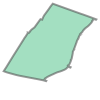

In [112]:
sansa=districts[districts.DENOM=='San Salvario'].geometry[1]
sansa

With the ``osmnx.pois.pois_from_polygon`` method we can retive **Point of Interest (pois)** from OSM that are inside a polygon. You can specify the type of POI with the argument ``amenities``. Here a complite list of amenities availabel in OSM. https://wiki.openstreetmap.org/wiki/Key:amenity

Now we get from OSM all the post_boxes present in San Salvario

In [121]:
post_office=osmnx.pois.pois_from_polygon(sansa,amenities=['post_box'])
post_office.head(5)

,osmid,geometry,amenity,element_type,collection_times,operator
1775803005,1775803005,POINT (7.67815 45.05697),post_box,node,NaN,NaN
2018187044,2018187044,POINT (7.67896 45.06050),post_box,node,NaN,NaN
2018737383,2018737383,POINT (7.68271 45.05727),post_box,node,NaN,NaN
2068706585,2068706585,POINT (7.68325 45.06024),post_box,node,Mo-Fr 16:00,Poste Italiane
3903194796,3903194796,POINT (7.67883 45.05538),post_box,node,NaN,NaN


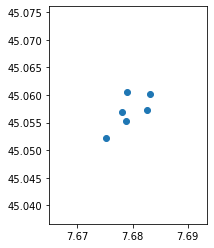

In [122]:
post_office.plot()

In [138]:
post_office.to_file('data/sansa_post.shp')

From OSMnx you can download even building foorprints with ``osmnx.footprints_from_polygon(polygon)``

In [139]:
buildings=osmnx.footprints_from_polygon(sansa)
buildings.head(5)

,nodes,alt_name,building,name,wikidata,wikipedia,geometry,building:levels,amenity,denomination,...,healthcare,shelter_type,club,members,type,castle_type,heritage,heritage:operator,ref:whc,office
22983906,"[247772089, 5628669859, 5628669860, 5628669861...",Torino Esposizioni,public,Palazzo delle Esposizioni,Q164264,it:Torino Esposizioni,"POLYGON ((7.68150 45.04960, 7.68135 45.04940, ...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29183694,"[320935391, 320935398, 7177673859, 7177673858,...",NaN,school,NaN,NaN,NaN,"POLYGON ((7.67759 45.04608, 7.67763 45.04619, ...",6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64903146,"[795500664, 2012325063, 2012325061, 2012325160...",NaN,synagogue,Tempio Israelitico,Q3508094,NaN,"POLYGON ((7.68188 45.06016, 7.68192 45.06022, ...",NaN,place_of_worship,catholic,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88200289,"[1024795823, 1024795135, 1024795189, 102479554...",NaN,yes,NaN,NaN,NaN,"POLYGON ((7.67500 45.05281, 7.67497 45.05273, ...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88200291,"[1024795083, 1024795155, 1024795332, 102479491...",NaN,yes,NaN,NaN,NaN,"POLYGON ((7.67518 45.05327, 7.67505 45.05330, ...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


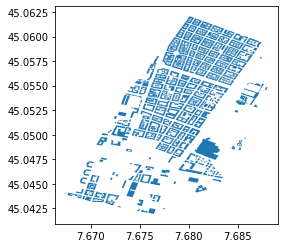

In [140]:
buildings.plot()

## Nearest points using Geopandas

Let's then see how it is possible to find nearest points from a set of origin points to a set of destination points using GeoDataFrames. Here, we will use the ``sansa_post.shp`` point data, and the ``addresses.shp`` address points from previous sections. 

In [141]:
post_office=gpd.read_file('data/sansa_post.shp')
adrr=gpd.read_file('data/addresses.shp')

In [144]:
print(adrr.crs)
adrr.head()

{'init': 'epsg:4326'}


,address,id,addr,geometry
0,"31, Via Nizza, San Salvario, Torino, Piemonte,...",1000,"Via Nizza 31, 10125 Turin, Italy",POINT (7.67749 45.05796)
1,"33, Via Nizza, San Salvario, Torino, Piemonte,...",1001,"Via Nizza 33, 00100 Turin, Italy",POINT (7.67740 45.05771)
2,"35, Via Nizza, San Salvario, Torino, Piemonte,...",1002,"Via Nizza 35, 10125 Turin, Italy",POINT (7.67677 45.05642)
3,"41/B, Via Nizza, San Salvario, Torino, Piemont...",1003,"Via Nizza 41, 10125 Turin, Italy",POINT (7.67642 45.05556)
4,"18, Via Saluzzo, San Salvario, Torino, Piemont...",1005,"Via Saluzzo 18, 10125 Turin, Italy",POINT (7.67917 45.05962)


In [145]:
print(post_office.crs)
post_office.head()

{'init': 'epsg:4326'}


,osmid,amenity,element_ty,collection,operator,geometry
0,1775803005,post_box,node,None,None,POINT (7.67815 45.05697)
1,2018187044,post_box,node,None,None,POINT (7.67896 45.06050)
2,2018737383,post_box,node,None,None,POINT (7.68271 45.05727)
3,2068706585,post_box,node,Mo-Fr 16:00,Poste Italiane,POINT (7.68325 45.06024)
4,3903194796,post_box,node,None,None,POINT (7.67883 45.05538)


SO, for each row of data in the `adrr` -table, we want to figure out the nearest address point and fetch some attributes related to that point. In other words, we want to apply the Shapely `nearest_points`function so that we compare each polygon centroid to all address points, and based on this information access correct attribute information from the address table. 

In [149]:
from shapely.geometry import Point, MultiPoint
from shapely.ops import nearest_points


For doing this, we can create a function that we will apply on the polygon GeoDataFrame:

In [150]:
def get_nearest_values(row, other_gdf, point_column='geometry', value_column="geometry"):
    """Find the nearest point and return the corresponding value from specified value column."""
    
    # Create an union of the other GeoDataFrame's geometries:
    other_points = other_gdf["geometry"].unary_union
    
    # Find the nearest points
    nearest_geoms = nearest_points(row[point_column], other_points)
    
    # Get corresponding values from the other df
    nearest_data = other_gdf.loc[other_gdf["geometry"] == nearest_geoms[1]]
    
    nearest_value = nearest_data[value_column].values[0]
    
    return nearest_value

By default, this function returns the geometry of the nearest point for each row. It is also possible to fetch information from other columns by changing the `value_column` parameter.

The function creates a MultiPoint object from `other_gdf` geometry column (in our case, the address points) and further passes this MultiPoint object to Shapely's `nearest_points` function. 

Here, we are using a method for creating an union of all input geometries called `unary_union`. 

- Let's check how unary union works by applying it to the address points GeoDataFrame:

In [151]:
unary_union = adrr.unary_union
print(unary_union)

MULTIPOINT (7.6643806 45.0641231, 7.6662203 45.0667017, 7.6764219 45.0555626, 7.6767686 45.0564172, 7.6768852 45.0566882, 7.6773995 45.0577129, 7.677492 45.0579573, 7.6775764 45.0572827, 7.6784896 45.054363, 7.6787857 45.0598705, 7.6787933 45.0601426, 7.6790375 45.0588861, 7.6791749 45.0596173, 7.6793074 45.0597369, 7.6794283 45.0597579, 7.6794588 45.0598973, 7.6797263 45.0577372, 7.6798312 45.0580089, 7.6798393 45.0594685, 7.6799064 45.0609813, 7.680029 45.0609199, 7.6801563 45.0584825, 7.6801585 45.0588564, 7.680203 45.0589716, 7.680219 45.0614422, 7.6802798 45.0588084, 7.6804328 45.0591121, 7.6806181 45.0617788, 7.681698 45.0588247, 7.6822403 45.0586958, 7.6826495 45.05848, 7.685799 45.067333, 7.6887732 45.0692593)


Okey now we are ready to use our function and find closest post office point for each address.
 - Try first applying the function without any additional modifications: 

In [154]:
adrr['nearest_post_box']=adrr.apply(get_nearest_values, other_gdf=post_office, point_column="geometry", axis=1)
adrr.head()

,address,id,addr,geometry,nearest_post_box
0,"31, Via Nizza, San Salvario, Torino, Piemonte,...",1000,"Via Nizza 31, 10125 Turin, Italy",POINT (7.67749 45.05796),POINT (7.6781547 45.0569696)
1,"33, Via Nizza, San Salvario, Torino, Piemonte,...",1001,"Via Nizza 33, 00100 Turin, Italy",POINT (7.67740 45.05771),POINT (7.6781547 45.0569696)
2,"35, Via Nizza, San Salvario, Torino, Piemonte,...",1002,"Via Nizza 35, 10125 Turin, Italy",POINT (7.67677 45.05642),POINT (7.6781547 45.0569696)
3,"41/B, Via Nizza, San Salvario, Torino, Piemont...",1003,"Via Nizza 41, 10125 Turin, Italy",POINT (7.67642 45.05556),POINT (7.6781547 45.0569696)
4,"18, Via Saluzzo, San Salvario, Torino, Piemont...",1005,"Via Saluzzo 18, 10125 Turin, Italy",POINT (7.67917 45.05962),POINT (7.6789604 45.0604997)


In [156]:
adrr['nearest_post_box']=adrr.apply(get_nearest_values, other_gdf=post_office, point_column="geometry", axis=1, value_column="osmid")
adrr.head()

,address,id,addr,geometry,nearest_post_box
0,"31, Via Nizza, San Salvario, Torino, Piemonte,...",1000,"Via Nizza 31, 10125 Turin, Italy",POINT (7.67749 45.05796),1775803005
1,"33, Via Nizza, San Salvario, Torino, Piemonte,...",1001,"Via Nizza 33, 00100 Turin, Italy",POINT (7.67740 45.05771),1775803005
2,"35, Via Nizza, San Salvario, Torino, Piemonte,...",1002,"Via Nizza 35, 10125 Turin, Italy",POINT (7.67677 45.05642),1775803005
3,"41/B, Via Nizza, San Salvario, Torino, Piemont...",1003,"Via Nizza 41, 10125 Turin, Italy",POINT (7.67642 45.05556),1775803005
4,"18, Via Saluzzo, San Salvario, Torino, Piemont...",1005,"Via Saluzzo 18, 10125 Turin, Italy",POINT (7.67917 45.05962),2018187044
